# Relatório de Análise VIII

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21572,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21573,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21574,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21575,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<Axes: >

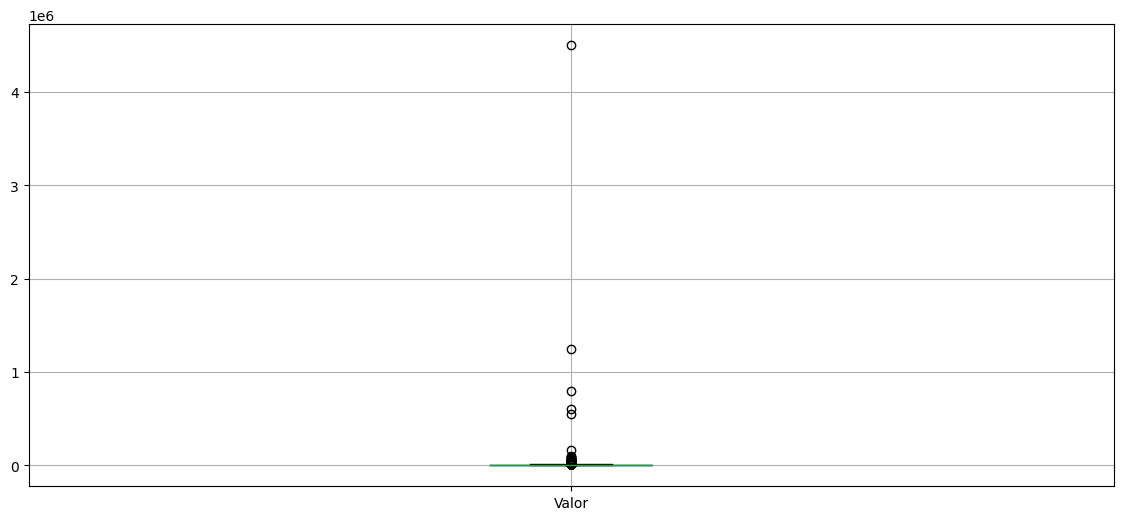

In [3]:
dados.boxplot(column='Valor')

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7550,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10527,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12529,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13691,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15353,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [5]:
valor = dados['Valor']

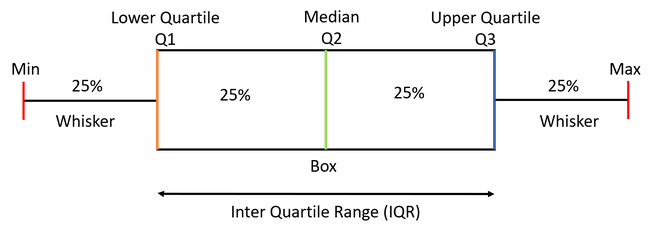

In [6]:
# Calculando os quartis para calcular os Outliers
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

<Axes: >

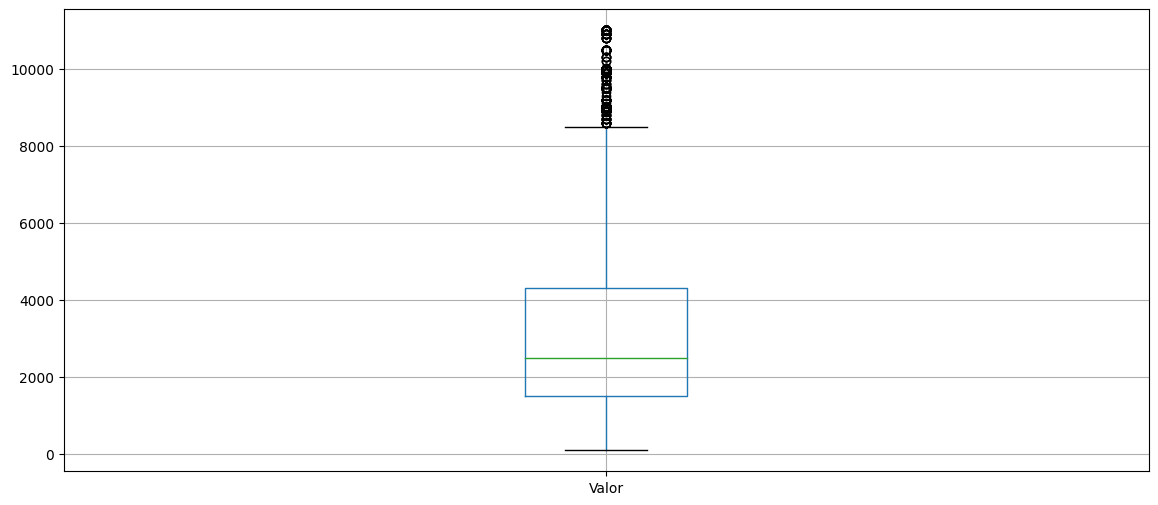

In [7]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

dados_new = dados[selecao]

dados_new.boxplot(column='Valor')

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

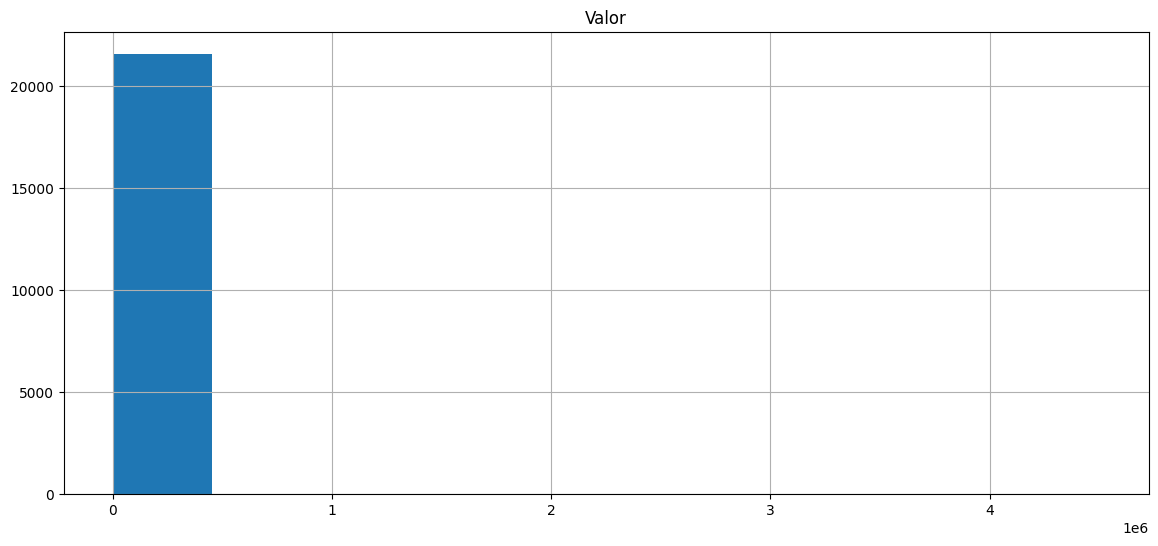

In [9]:
dados.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

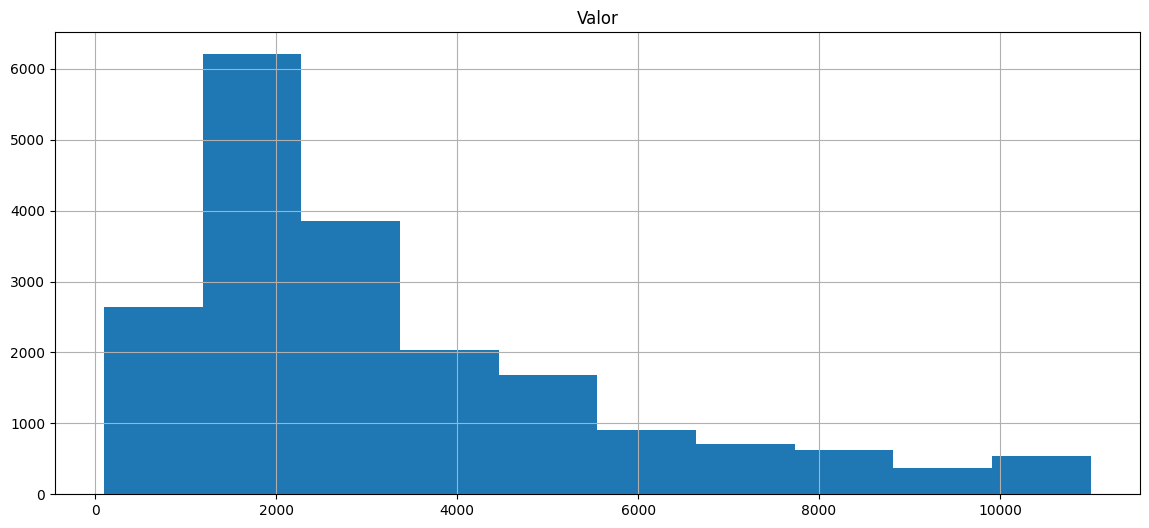

In [10]:
dados_new.hist(['Valor'])

# Identificando e Removendo Outliers por Grupo

<Axes: title={'center': 'Valor'}, xlabel='Tipo'>

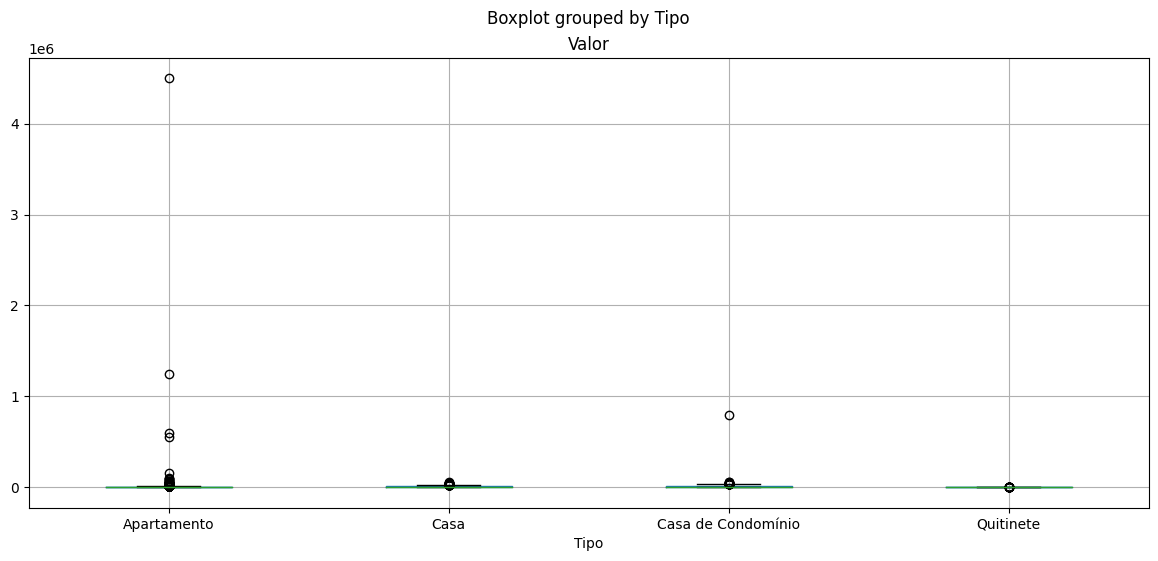

In [11]:
# Separando os dados por grupos, podemos ter uma visualização melhor do todo: há imóveis que são possíveis e esperados que 
# tenham valores altos por serem de auto-padrão, já outros como uma Quitinete, isso não é esperado

dados.boxplot(['Valor'], by='Tipo')

In [13]:
grupo_tipo_valor = dados.groupby('Tipo')['Valor']

In [18]:
grupo_tipo_valor

In [19]:
# Calculando os quartis para calcular os Outliers
Q1 = grupo_tipo_valor.quantile(.25)
Q3 = grupo_tipo_valor.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [24]:
base_valor_imovel_tipo = pd.DataFrame()

for tipo in grupo_tipo_valor.groups.keys():
    tipo_imovel = dados['Tipo'] == tipo
    dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = tipo_imovel & dentro_limite
    
    dados_selecao = dados[selecao]
    base_valor_imovel_tipo = pd.concat([base_valor_imovel_tipo, dados_selecao])

In [25]:
base_valor_imovel_tipo

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21440,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21480,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21500,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21566,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
